In [1]:
load("hssp.sage")
load("extendhssp.sage")
import numpy as np
import random
import matplotlib.pyplot as plt


---Emulatig uniform distribution---


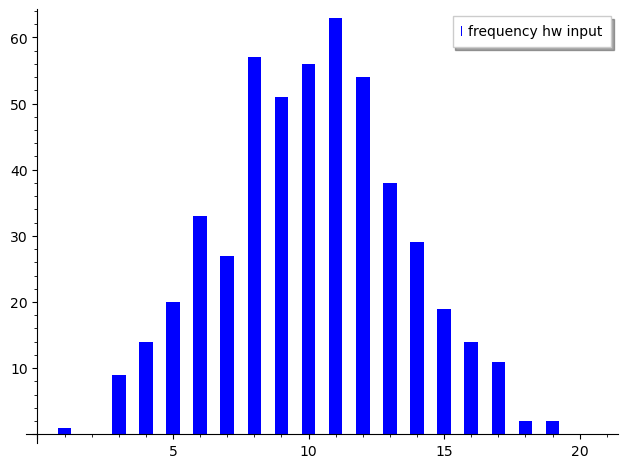

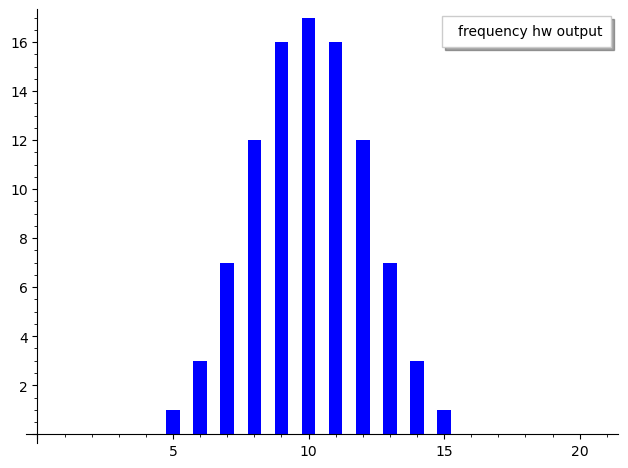

m
80
(80, 20)


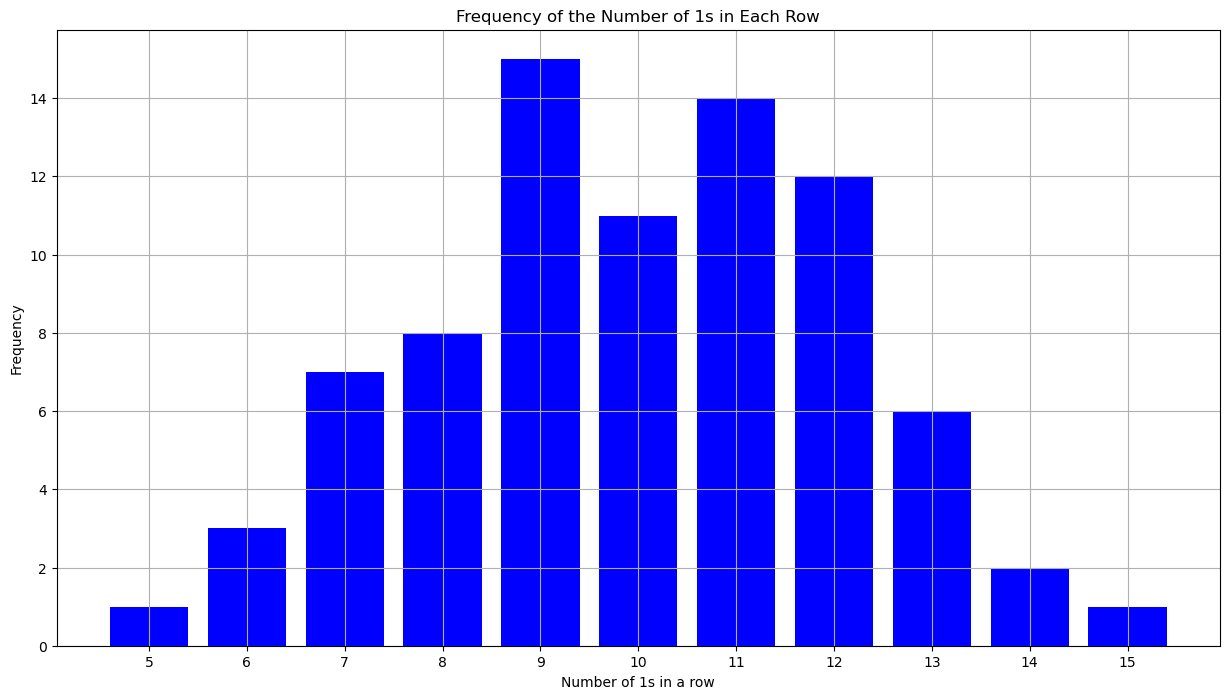

(80, 20)
(20, 10)
1055328592480885055914308532039
1055328592480885055914308532039
可逆
Bi rank10
Step 1
LLL step1: 0.2
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.3
Step2_BK_mat 在这儿
BKZ beta=20: 0.0
错误 0


AttributeError: 'sage.rings.integer.Integer' object has no attribute 'T'

In [71]:
batch_size = 20

length = 10



print ("---Emulatig uniform distribution---")
n=batch_size
m0=100
data=np.load(f"./expdata/expdata_batchsize_20/gradients_fc1_relu_binary_epoch_1_batch_0.npy")
# random_indices = np.random.permutation(data_original.shape[0])

# 使用随机的行索引来重排数组
# data = data_original[random_indices, :]
# print(data == data_original)
#data=np.load("/Users/jichanglong/Desktop/hssp_All/quantize/del_X_fl.npy")
#print(data.shape)
D=matrix(ZZ,data)
#print("D的形状，D代表的是每个图像被做的500次判断，因此为10,500")
#print(D.dimensions())
#print(D[0])
e=vector(ones_matrix(1,n))

freqD=(n+1)*[0]
#print(e*D)
#每层被激活的总个数

for x in e*D: 
    #print(x)
    freqD[x]+=1
#0-10这11个元素分别有多少个        
#print(freqD)
freqU=[binomial(n,i)/2.**n for i in range(n+1)]
#print(freqU)
#这11个元素分别占的比例
c=dict()
for x in D.T: 
   h=x*e
   if h in c.keys(): c[h]+=[x]
   else: c[h]=[x]
sampleSize=[int(m0*f) for f in freqU]
#print(sampleSize)
L = []
# 假设 L 是一个列表，n 和 sampleSize 已经定义
for i in range(n+1):
    # 先检查键 i 是否存在于字典 c 中
    if i in c:
        # 如果存在，再检查 c[i] 的长度是否大于等于 sampleSize[i]
        if len(c[i]) >= sampleSize[i]:
            # 如果是，正常采样
            L += random.sample(c[i], k=sampleSize[i])
        else:
            # 如果不是，取所有元素
            L += c[i]

# L = []
# all_elements = []
# for key, value in c.items():
#     all_elements.extend(value)
# # 然后，从这个列表中随机选取100个元素，前提是列表长度至少为100
# L += random.sample(all_elements, 80)

# L= []

# if 3 in c and len(c[3]) >= 100:
#     # 从键为 3 的值列表中随机选择 100 个列表
#     selected_lists = random.sample(c[3], 100)
#     # 假设 L 是用来收集选中的列表的列表
#     L.extend(selected_lists)  # 将选中的列表添加到 L 中
# else:
#     print("Error: 键为 3 的值中不足100个列表可供选择。")

# print("L的形状,因为前面被转置过，所以这里的L代表90个神经对10个图像的判断")    
#print(len(L))

while True:
   #oldX = matrix(ZZ,L)
   random.shuffle(L)
   newX=matrix(ZZ,L)
   #print("比大小")
   #print(oldX == newX)
   if newX.rank()==n: break 
freqnewX=(n+1)*[0]
for x in newX*e: freqnewX[x]+=1
G1=bar_chart(freqD, legend_label='frequency hw input')
G2=bar_chart(freqnewX, legend_label='frequency hw output')
G3=bar_chart(freqU, legend_label='frequency hw uniform')
#print(freqU)
#print(freqnewX)
for g in [G1,G2]: g.show()
    
    
    
   

    
load("extendhssp.sage")
m=(newX.dimensions()[0])//n*n
print("m")
print(m)
l = length
x0,A,dummyX,dummyB=genParams_mat(m=m,l=batch_size)

Y=newX[:m]

#m = 100

#随机
#np.random.seed(0)

# 生成一个80*10的矩阵，0和1的个数比例为3:7

# size = (m, n)
# p = [0.5, 0.5]  # 0和1出现的概率
# print(p)
# # 使用numpy的random.choice来生成矩阵
# Y = np.random.choice([0, 1], size=size, p=p)


Y = np.array(Y)
print(Y.shape)
ones_count_per_row = np.sum(Y, axis=1)

# 计算1的个数的频率分布
unique, counts = np.unique(ones_count_per_row, return_counts=True)
frequencies = dict(zip(unique, counts))

# 绘制柱状图
plt.figure(figsize=(15, 8))  # 设置图形大小
plt.bar(frequencies.keys(), frequencies.values(), color='blue')
plt.title('Frequency of the Number of 1s in Each Row')
plt.xlabel('Number of 1s in a row')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(ticks=range(min(unique), max(unique) + 1))  # 设置x轴刻度
plt.show()

Y = matrix(ZZ,Y)
#print("_____---_____")
#print(m)
print(Y.dimensions())
#alp=np.load(f"/Users/jichanglong/Desktop/hssp_All/FL/images_epoch_{epoch}_batch_10.npy")

alp=np.load(f"./expdata/expdata_batchsize_20/images_epoch_1_batch_0.npy")
alp = (alp + 1.0) / 2.0

# 将像素值缩放到[0,255]的范围
alp = (alp * 255.0).astype(np.uint8)

# 转置维度，以便图像数据变为(batch_size, height, width, channels)
alp = np.transpose(alp, (0, 2, 3, 1))
alp = alp.reshape(batch_size, -1)
 
#alp=np.load("/Users/jichanglong/Desktop/hssp_All/quantize/alpha10_3072.npy")
#print(alp.shape)

Aifull=matrix(ZZ,alp)
#print(Aifull.dimensions())


someA=random.sample(Aifull.columns(),length)
Ai=matrix(ZZ,someA).T
print(Ai.dimensions())
while True:
    rows_list = list(Y.rows())
    # 随机打乱行顺序
    random.shuffle(rows_list)
    # 将打乱后的行列表转换回矩阵
    Y = matrix(rows_list)
    Bi=Y*Ai%x0
    s = Matrix(Integers(x0),Bi[:l,:l]).determinant()
    print(s)
    if s!=0:
        print(s)
        print("可逆")
        break
    else:
        print("Bi矩阵不可逆")



# someA=random.sample(Aifull.columns(),l)
# Ai=matrix(ZZ,someA)
# Bi=Y*Ai%x0



# someA=random.sample(Aifull.columns(),l)
# #print(someA)
# #print("someA,表示从原始图像中，对不同图像的同一个位置选择出pixel，随机选10次")
# #Ai=matrix(ZZ,someA).T
# Ai=matrix(ZZ,someA)
# #print("AI")
# #print(Ai)
# Bi=Y*Ai%x0

# print("90行全连接层对每个图像的pixel和")
# print(Bi)
print(f"Bi rank{Bi.rank()}")
# print(n)
# print(x0)
#print(f"Ai.rank(){Ai.rank()}")

kei,tt1,tt10,tt1O=Step1_Mat(n,x0,Ai,Y,Bi,m)

#MBi,beta,rAi =Step2_BK_mat(kei,Y,Ai,n,m,x0,Bi)
MBi,beta,rAi,N,C =Step2_BK_mat(kei,Y,Ai,n,m,x0,Bi)
#print("MBi")
#print(MBi.dimensions())
#print(MBi)
matrixB=Y*Aifull%x0
#print("matrixB")
#print(matrixB.dimensions())

res_alpha=np.linalg.lstsq(MBi.T, matrixB, rcond=None)[0]

#print(res_alpha.shape)
#print('Reconstructed input using NS attack:')
num_col = batch_size
num_row = int(n/num_col)
num_samples = num_row*num_col
shape= (32,32,3)
fig, axes = plt.subplots(num_row, num_col, figsize=(1.*num_col,1.*num_row))
for i, ax in enumerate(axes.flat):
      ax.set_axis_off()
      ax.imshow(res_alpha[i].reshape(shape).astype(np.uint8), cmap='gray') 